In [ ]:
# Requires Jupyter Dashboards and iPywidgets
!pip install jupyter_dashboards
!jupyter dashboards quick-setup --sys-prefix

!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

In [1]:
import pandas as pd
from time import time
from gensim.models.doc2vec import Doc2Vec,TaggedDocument
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE, Isomap, MDS
tsne=TSNE(metric='cosine')
iso=Isomap()
from gensim import matutils
import ipywidgets as widgets
from IPython.display import display,clear_output
from ast import literal_eval
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\ionab\Anaconda3\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Topic Modelling using the doc2vec Model

## Load the dataset and model

In [2]:
model = Doc2Vec.load("../Data/doc2vec100.model")

In [3]:
song_df=pd.read_csv("../Data/song_vecs100.csv",sep=',',encoding='utf-8')
song_df.set_index('index',inplace=True)
song_df.sort_index(inplace=True)
song_df['tokens']=[literal_eval(t) for t in song_df.tokens]
song_df['vec100']=[[float(y) for y in x[1:-1].split()] for x in song_df.vec100]
print(len(song_df))
song_df.head()

56148


,language,artist,link,song,lyrics,release_date,album,genre,song_length,label,tokens,vec100
index,,,,,,,,,,,,
0,NaN,ABBA,/a/abba/shes+my+kind+of+girl_20598417.html,She's My Kind Of Girl,"Look at her face, it's a wonderful face \r\r\...",1973.0,Ring Ring,Pop,153,"""She's My Kind Of Girl"" by ABBA","[look, face, wonderful, face, means, special, ...","[-0.1552842, 0.32124212, -0.10973388, 0.398913..."
1,NaN,ABBA,/a/abba/andante+andante_20002708.html,"Andante, Andante","Take it easy with me, please \r\r\r\r\r\r\r\r...",NaN,NaN,NaN,260,"""Andante, Andante"" by ABBA","[easy, touch, gently, like, summer, evening, b...","[-0.49583471, 0.06956885, 0.10521561, 0.064079..."
2,NaN,ABBA,/a/abba/as+good+as+new_20003033.html,As Good As New,I'll never know why I had to go \r\r\r\r\r\r\...,NaN,NaN,NaN,312,"""As Good As New"" by ABBA","[know, lousy, rotten, boy, tough, packing, stu...","[0.27522475, 0.13831177, 0.1392298, 0.53600252..."
3,NaN,ABBA,/a/abba/bang_20598415.html,Bang,Making somebody happy is a question of give an...,1975.0,ABBA,Pop,200,"""Bang"" by ABBA","[making, somebody, happy, question, learn, com...","[-0.5095306, -0.26407892, 0.92521173, 0.100037..."
4,NaN,ABBA,/a/abba/bang+a+boomerang_20002668.html,Bang-A-Boomerang,Making somebody happy is a question of give an...,1975.0,ABBA,Pop,198,"""Bang-A-Boomerang"" by ABBA","[making, somebody, happy, question, learn, com...","[-0.68000865, -0.22533123, 0.67675865, 0.08415..."


## Concept Search
Use these widgets to search for lyrics that pertain to a given topic. Topics/Concepts are defined by space=separated words.

In [4]:
def find_for_concept(b):
    sim=model.docvecs.most_similar([model.wv[word] for word in concept.value.split()], topn=n_docs.value)
    doc_list=[[song_df.loc[int(s[0])].label,song_df.loc[int(s[0])].lyrics] for s in sim]
    wid_list=[widgets.HTML(doc[1].replace('\n','<br>')) for doc in doc_list]
    header=widgets.HTML("Songs about {}".format(concept.value.replace(' ',', ')))
    accordion=widgets.Accordion(wid_list)
    for i,doc in enumerate(doc_list):
        accordion.set_title(i, doc[0])
    clear_output()
    display(widgets.HBox([concept,n_docs, submit_concept]))
    display(widgets.VBox([header, accordion]))


In [5]:
concept=widgets.Text(description='Concept: ',placeholder='Enter terms separated by spaces')
n_docs=widgets.BoundedIntText(value=3,min=1,max=20.0,description='# of docs:')
submit_concept=widgets.Button(description='Submit')
submit_concept.on_click(find_for_concept)

display(widgets.HBox([concept,n_docs, submit_concept]))


A Jupyter Widget

A Jupyter Widget

## Topic Tagging
Topics have been defined in topics.txt and will be used to tag all the lyrics with a topic.

In [4]:
pd.set_option('max_colwidth', 800)

with open("../Data/topics.txt",'r') as f:
    topics=f.read()
    topics=pd.DataFrame([t.split('\t') for t in topics.split('\n')], columns=['Topic','words'])
    topics.set_index('Topic', inplace=True)

topics['vector']=[model.infer_vector(w) for w in topics.words]
topics

,words,vector
Topic,,
LOVE,adore angel baby beautiful body boy curve darling destiny dream fall feel feeling figure fine forever girl good gurl heart hearts hot hug kiss life lonely love loved lovely lover loving lust me perfect promise sex sexual sexy shawty she shorty smile soul soulmate special sweet sweetheart together touch treasure true unique want woman you,"[-0.00370648, -0.000805439, -0.00387124, -0.00488481, -0.00434961, 0.00402595, 0.00131009, -0.00146395, -0.000847751, -0.00345687, 0.00497067, 0.00305861, -0.00123106, 0.00443844, 0.000314826, 0.0021594, 0.00472453, -0.00468472, 0.000242839, -0.00458939, -0.00417033, -0.00489002, 0.000455352, 0.00229677, 0.00097488, -0.00180591, -0.00330444, -9.05691e-05, 0.00193691, 0.000850374, -0.000428364, 0.00256313, 0.00408721, 0.000905484, -0.00475369, -0.00279286, -0.000864953, 0.00348965, 0.000370232, 0.000375576, 0.00285044, 0.00195897, -0.00111532, 0.00281603, -0.00423572, -0.00329963, 0.00454924, -0.00306498, -0.00132897, 0.00106511, 0.0043009, -0.000828304, -0.00333134, 0.00328617, -0.00457003, -0.0048051, -0.00491235, 0.00200448, -0.00245948, -0.00412457, 0.00182319, 0.00329262, -0.001603..."
HAPPINESS,celebrate celebration dream free good happiness happy hope joy laugh laughter love memory pleasures smile sun sunshine,"[-0.00250445, 0.0019536, -0.00190668, 0.00117802, -0.00152096, -0.00134243, 0.000313537, 0.00170079, -0.00458924, 0.00441016, 0.00400044, 0.00370878, -0.000860337, 0.00466058, -0.0048602, 0.00119601, -0.00186662, -0.00455188, -0.00172879, -0.00214962, 0.000322849, -0.00413872, 0.00261091, 0.000928587, 0.00414727, 0.00485637, -0.00207634, 0.00473527, 0.00450324, 0.000432444, 0.00159441, -0.00396195, -0.004843, -0.0013445, -0.00223739, 0.00204445, 0.00405066, -0.00170146, -0.000553313, -0.000100144, -0.00389422, -0.00206182, 0.0023488, 0.0016767, 0.00170105, -0.00407059, -0.00172758, -0.00286539, 0.00123349, 0.00177224, 0.00438963, -0.00355993, -0.00248689, 0.00257449, 0.00491467, 0.000886696, 0.000973956, 0.000669808, 0.00453329, 0.000945926, -0.00430504, -0.00494743, -0.00293281, 0.001..."
CHRISTMAS,bells bright carol christmas claus gifts happy holiday holly home jesus joy lights merry mistletoe night presents reindeer ringing santa snow snowman tree winter,"[-0.00308551, -0.000216367, 0.00239756, 0.00169985, 0.000671152, -0.0013488, 0.0037479, 0.000384544, 0.00124972, -0.0025235, -0.00271276, 0.00386714, 0.000857469, -0.00228641, 0.00354183, -0.00372816, -0.00349702, 0.00304557, 0.00355821, 0.00283774, -0.00198968, -0.00490345, -0.00453693, 0.00328784, 0.00351645, -0.00263263, -0.00355719, 0.0024904, 0.00419281, -0.000505064, -0.00216167, -0.000223359, 0.00353824, 0.000644599, -0.000372291, 0.00110267, -0.0036134, 0.000343474, -0.00455873, 0.00317657, 0.00405388, -0.00189981, -0.00448909, 0.00179472, 7.44894e-05, -0.00273544, 0.00133455, 0.00131416, 0.00214157, 0.00328805, -0.00188851, -0.00146578, 0.00393767, 0.00160578, 0.00116799, 0.00124736, -0.00221635, -0.0035771, 0.00432123, -7.45195e-05, -0.000474249, 0.00181426, 0.00371328, 0.004..."
SADNESS,alone away blues break breaking broken clouds cry crying darkness dead death depressed depression despair die emptiness ex go goodbye grief hate heart heartbreak heartbreaker kill leave lie lonely memories miss murder pain rain sad sadness silence solitude sorrow sorry tear teardrops tears victim war,"[0.00378474, 0.000107998, -0.00474681, -0.00415889, 0.000242387, -9.98959e-05, -0.00176854, 0.000713568, 0.00188335, -0.00275962, 0.00391861, -0.00242348, -0.00386116, -0.0037155, 0.000535131, -0.000931492, 0.00103226, -0.00155472, 0.00335378, -0.000737162, 0.00365393, 0.00332953, -0.000308208, -0.000904206, 0.000877829, 0.00380884, -0.000784964, -0.00208226, 0.000565063, -0.000284772, 0.00408133, -0.00197098, -0.00388771, -0.00269657, -0.00419747, -0.000903822, -0.00247688, -0.00216805, -0.00401934, 0.00204125, 0.000158213, -0.00487101, -0.00204466, 0.00362436, -0.00376404, 0.0010442, 0.00486101, -0.0033529

We tag each song with the closest topic

In [9]:
for i,row in song_df[song_df['song'].str.contains("Christmas")].head(3).iterrows():
    sim={}
    for g in topics.index:
        sim[g]=1-cosine(model.docvecs[str(i)],topics.loc[g]['vector'])
    print(row['song'],sorted(sim.items(), key=lambda x: x[1], reverse=True)[:3])
    top=sorted(sim.items(), key=lambda x: x[1], reverse=True)[0]
    print(top)

#song_df.head()

We Wish You A Merry Christmas [('MONEY', 0.088505120353706834), ('REMINISCING', 0.084029537816899036), ('DRUGS', 0.083446535911826936)]
('MONEY', 0.088505120353706834)
Christmas In Dixie [('SADNESS', 0.081418245395853406), ('REMINISCING', 0.060771118235644184), ('DRUGS', 0.026999555788553065)]
('SADNESS', 0.081418245395853406)
Christmas In Your Arms [('CHRISTMAS', 0.057264793931278479), ('POWER', 0.036243916124162778), ('REMINISCING', 0.034082186157564198)]
('CHRISTMAS', 0.057264793931278479)


In [55]:
for i,row in song_df.iterrows():
    sim={}
    for g in topics.index:
        sim[g]=1-cosine(model.docvecs[str(i)],topics.loc[g]['vector'])
    top=sorted(sim.items(), key=lambda x: x[1], reverse=True)[0]
    song_df.loc[i,'topic']=top[0]
    song_df.loc[i,'topic_sim']=top[1]

#song_df.head()

In [56]:
Counter(song_df.topic)

Counter({'ANGER': 3190,
         'CHRISTMAS': 7391,
         'DRUGS': 3338,
         'HAPPINESS': 5108,
         'INSPIRATION': 5629,
         'LOVE': 7251,
         'MONEY': 1958,
         'POWER': 6233,
         'RELIGION': 2217,
         'REMINISCING': 9980,
         'SADNESS': 3853})

We can now get the list of songs for a particular topic:

In [60]:
song_df.query("topic=='{}'".format('DRUGS')).sort_values('topic_sim', ascending=False).loc[:,['song','artist','lyrics','topic_sim']]

,song,artist,lyrics,topic_sim
index,,,,
22689,Moon Girl,Alphaville,"Sometimes it seems the night will last forever \r\r\r\r\r\r\r\r\r\r\r\r\nsometimes it seems that darkness always falls \r\r\r\r\r\r\r\r\r\r\r\r\na dark star woke you up and with a dark star, you go to bed \r\r\r\r\r\r\r\r\r\r\r\r\nyou're sinking slowly into the deep \r\r\r\r\r\r\r\r\r\r\r\r\nyou wonder if you ever touch the ground \r\r\r\r\r\r\r\r\r\r\r\r\nwhere you would walk through sparkling spheres, \r\r\r\r\r\r\r\r\r\r\r\r\non strangest drugs and without fears \r\r\r\r\r\r\r\r\r\r\r\r\nyou feel just like a little girl \r\r\r\r\r\r\r\r\r\r\r\r\nand all your dreams lie frozen on the moon \r\r\r\r\r\r\r\r\r\r\r\r\nyou left them ther some time ago \r\r\r\r\r\r\r\r\r\r\r\r\nbut it ain't true that you don't need them anymore \r\r\r\r\r\r\r\r\r\r\r\r\nyou are so beautiful, you...",0.338972
6958,Morale...You've Lost That Loving Feeling,Human League,Don't talk \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\nClose the door \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\nYou've been here before \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\nYour shape dim \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\nI'm an old man now \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\nThe air's thin \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\nThe walls very damp now \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\nAnd if I don't go \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\nI'll always be stuck here in this poor little room \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\nWith a view of the corner \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\nI don't forget \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\nThe light growing weak now \r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\nExperience is useless \r\r\r\r\r\r\r\r\r\r\...,0.334356
35349,Enemy,Idina Menzel,In the roses \r\r\r\r\r\r\r\r\r\r\r\r\nIn the spring \r\r\r\r\r\r\r\r\r\r\r\r\nI remember \r\r\r\r\r\r\r\r\r\r\r\r\nThere was a time \r\r\r\r\r\r\r\r\r\r\r\r\nI wasn't afraid of anything \r\r\r\r\r\r\r\r\r\r\r\r\nBut with the lilacs \r\r\r\r\r\r\r\r\r\r\r\r\nAnd the rain \r\r\r\r\r\r\r\r\r\r\r\r\nOne day you went away \r\r\r\r\r\r\r\r\r\r\r\r\nI remember \r\r\r\r\r\r\r\r\r\r\r\r\nI forgot everything \r\r\r\r\r\r\r\r\r\r\r\r\n[Chorus:] \r\r\r\r\r\r\r\r\r\r\r\r\nMy mother's always trying to tell me \r\r\r\r\r\r\r\r\r\r\r\r\nHow to be grateful how to believe \r\r\r\r\r\r\r\r\r\r\r\r\nMy father's always trying to say \r\r\r\r\r\r\r\r\r\r\r\r\nBaby you're beautiful in every way \r\r\r\r\r\r\r\r\r\r\r\r\nMy lover's always got me in his arms \r\r\r\r\r\r\r\r\r\r\r\r\nTrying to...,0.327788
38982,It's A Beautiful Life,Kenny Rogers,"Beautiful Life \r\r\r\r\r\r\r\r\r\r\r\nYou can do what you want just seize the day \r\r\r\r\r\r\r\r\r\r\r\nWhat you're doing tomorrow's gonna come your way \r\r\r\r\r\r\r\r\r\r\r\nDon't you ever consider giving up, you will find, oooh \r\r\r\r\r\r\r\r\r\r\r\nIt's a beautiful life, oooh \r\r\r\r\r\r\r\r\r\r\r\nIt's a beautiful life, oooh \r\r\r\r\r\r\r\r\r\r\r\nIt's a beautiful life, oooh \r\r\r\r\r\r\r\r\r\r\r\nI just want to be here beside you \r\r\r\r\r\r\r\r\r\r\r\nAnd stay until the break of dawn \r\r\r\r\r\r\r\r\r\r\r\nTake a walk in the park when you feel down \r\r\r\r\r\r\r\r\r\r\r\nThere's so many things there that's gonna lift you up \r\r\r\r\r\r\r\r\r\r\r\nSee the nature in bloom a laughing child \r\r\r\r\r\r\r\r\r\r\r\nSuch a dream, oooh \r\r\r\r\r\r\r\r\r\r\r\n...",0.327686
34660,Savage,Helloween,"You hear the people talking you walk the wrong street \r\r\r\r\r\r\r\r\r\r\r\r\nPainting all things black and step on your feet \r\r\r\r\r\r\r\r\r\r\r\r\nFlabby stomach, styled hair, trousers full of air \r\r\r\r\r\r\r\r\r\r\r\r\nTheir morality is real ours isn't there \r\r\r\r\r\r\r\r\r\r\r\r\n \r\r\r\r\r\r\r\r\r\r\r\r\nThey don't know, no they can't see \r\r\r\r\r\r\r\r\r\r\r\r\nOur hearts close to the sun \r\r\r\r\r\r\r\r\r\r\r\r\nDifferent in our hearts filled with \r\r\r\r\r\r\r\r\r\r\r\r\nThat faith we carry on \r\r\r\r\r\r\r\r\r\r\r\r\n \r\r\r\r\r\r\r\r\r\r\r\r\n[Chorus] \r\r\r\r\r\r\r

Let's visualise the topic vectors in the document space:

In [9]:
song_sample=song_df.sample(5000).loc[:,['label','vec100','topic']]
song_sample.set_index('label', inplace=True)

%time vec2D=tsne.fit_transform(topics.vector.tolist()+song_sample.vec100.tolist())

topics['x']=[x[0] for x in vec2D[:len(topics)]]
topics['y']=[x[1] for x in vec2D[:len(topics)]]

song_sample['x']=[x[0] for x in vec2D[len(topics):]]
song_sample['y']=[x[1] for x in vec2D[len(topics):]]

Wall time: 2min 22s


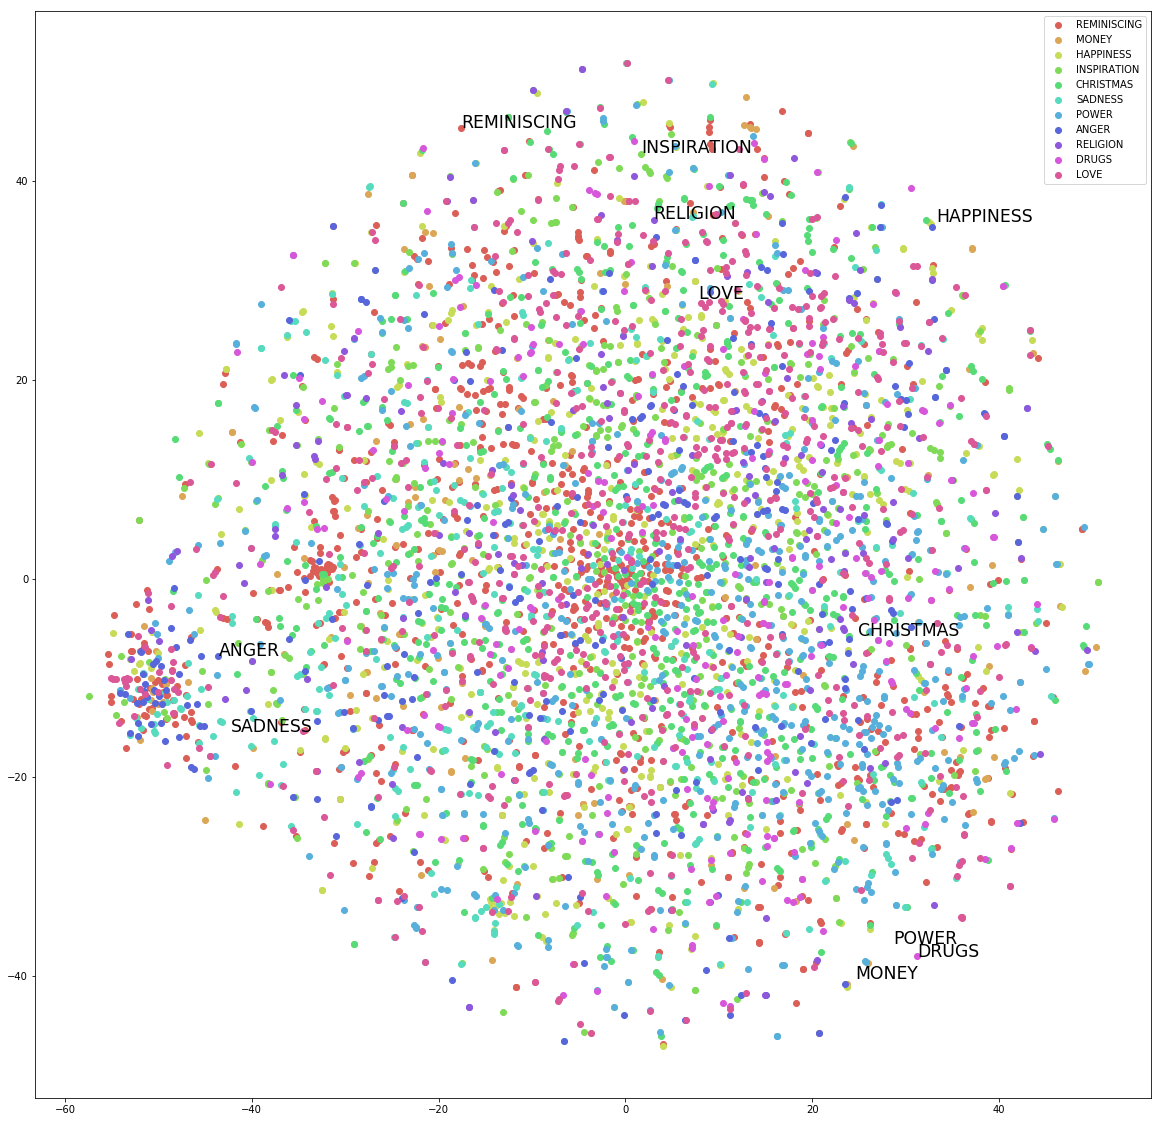

In [28]:
palette=sns.color_palette('hls',len(set(song_df.topic)))

plt.figure(figsize=(20,20))
for i,topic in enumerate(set(song_df.topic)):
    temp=song_sample.query("topic == '{}'".format(topic))
    if len(temp):
        plt.scatter(temp['x'],temp['y'], label=topic, c=palette[i])
for i,row in topics.iterrows():
    plt.text(row['x'],row['y'], i, size='xx-large')
plt.legend()
plt.savefig('../Figures/topic_vectors.pdf')
plt.show()